In [33]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

# Configuration adjustments for faster training
max_features = 2000  # Number of words to consider as features
max_len = 500  # Use a moderate sequence length
embedding_dim = 64  # Reduce embedding dimensionality
batch_size = 1024  # Increase batch size for faster epochs

# Load the IMDb data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess the data
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Define the model with a 1D Convolutional layer followed by Global Average Pooling
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=max_len))
model.add(layers.Conv1D(16, 7, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [34]:
# Train the model with the adjusted configuration
history = model.fit(x_train, y_train,
                    epochs=30,  # Adjust the number of epochs as needed
                    batch_size=batch_size,
                    validation_split=0.3)


Epoch 1/30
18/18 [==============================] - 7s 382ms/step - loss: 0.6922 - accuracy: 0.5221 - val_loss: 0.6908 - val_accuracy: 0.4933
Epoch 2/30
18/18 [==============================] - 7s 370ms/step - loss: 0.6874 - accuracy: 0.5225 - val_loss: 0.6822 - val_accuracy: 0.5977
Epoch 3/30
18/18 [==============================] - 7s 390ms/step - loss: 0.6742 - accuracy: 0.6106 - val_loss: 0.6623 - val_accuracy: 0.6464
Epoch 4/30
18/18 [==============================] - 8s 428ms/step - loss: 0.6474 - accuracy: 0.6775 - val_loss: 0.6262 - val_accuracy: 0.7464
Epoch 5/30
18/18 [==============================] - 7s 416ms/step - loss: 0.6024 - accuracy: 0.7814 - val_loss: 0.5728 - val_accuracy: 0.7948
Epoch 6/30
18/18 [==============================] - 8s 435ms/step - loss: 0.5449 - accuracy: 0.8073 - val_loss: 0.5165 - val_accuracy: 0.8160
Epoch 7/30
18/18 [==============================] - 8s 418ms/step - loss: 0.4881 - accuracy: 0.8312 - val_loss: 0.4656 - val_accuracy: 0.8371
Epoch 

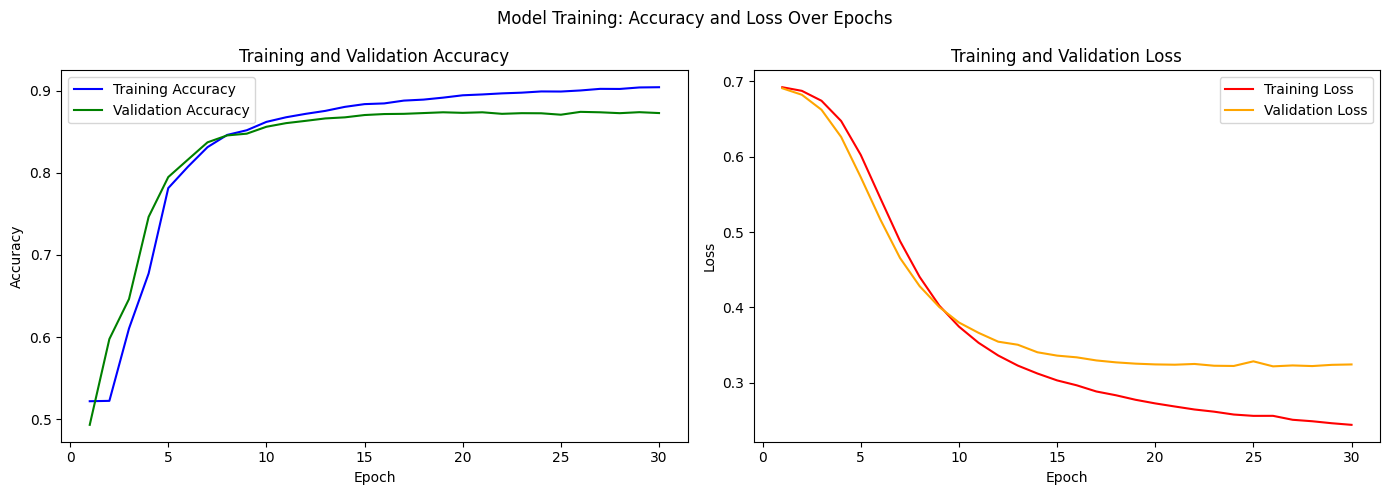

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs_range, history_df['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_df['loss'], label='Training Loss', color='red')
plt.plot(epochs_range, history_df['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training: Accuracy and Loss Over Epochs")
plt.tight_layout()
plt.show()


In [36]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers

# Configuration adjustments for faster training
max_features = 2000  # Number of words to consider as features
max_len = 500  # Use a moderate sequence length
embedding_dim = 64  # Reduce embedding dimensionality
batch_size = 512  # Increase batch size for faster epochs

# Load the IMDb data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess the data
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Define the model with a 1D Convolutional layer followed by Global Average Pooling
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, embedding_dim, input_length=max_len))
model.add(layers.Conv1D(16, 7, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.015))  # Add Dropout
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model with the adjusted configuration and callbacks
history = model.fit(x_train, y_train,
                    epochs=30,  # Adjust the number of epochs as needed
                    batch_size=batch_size,
                    validation_split=0.3)


Epoch 1/30
35/35 [==============================] - 7s 198ms/step - loss: 0.6933 - accuracy: 0.5397 - val_loss: 0.6880 - val_accuracy: 0.5727
Epoch 2/30
35/35 [==============================] - 7s 196ms/step - loss: 0.6742 - accuracy: 0.6506 - val_loss: 0.6515 - val_accuracy: 0.7109
Epoch 3/30
35/35 [==============================] - 8s 222ms/step - loss: 0.6153 - accuracy: 0.7566 - val_loss: 0.5674 - val_accuracy: 0.7988
Epoch 4/30
35/35 [==============================] - 8s 228ms/step - loss: 0.5239 - accuracy: 0.8157 - val_loss: 0.4847 - val_accuracy: 0.8257
Epoch 5/30
35/35 [==============================] - 8s 234ms/step - loss: 0.4498 - accuracy: 0.8387 - val_loss: 0.4293 - val_accuracy: 0.8492
Epoch 6/30
35/35 [==============================] - 8s 226ms/step - loss: 0.4044 - accuracy: 0.8547 - val_loss: 0.3988 - val_accuracy: 0.8568
Epoch 7/30
35/35 [==============================] - 8s 218ms/step - loss: 0.3782 - accuracy: 0.8635 - val_loss: 0.3816 - val_accuracy: 0.8632
Epoch 

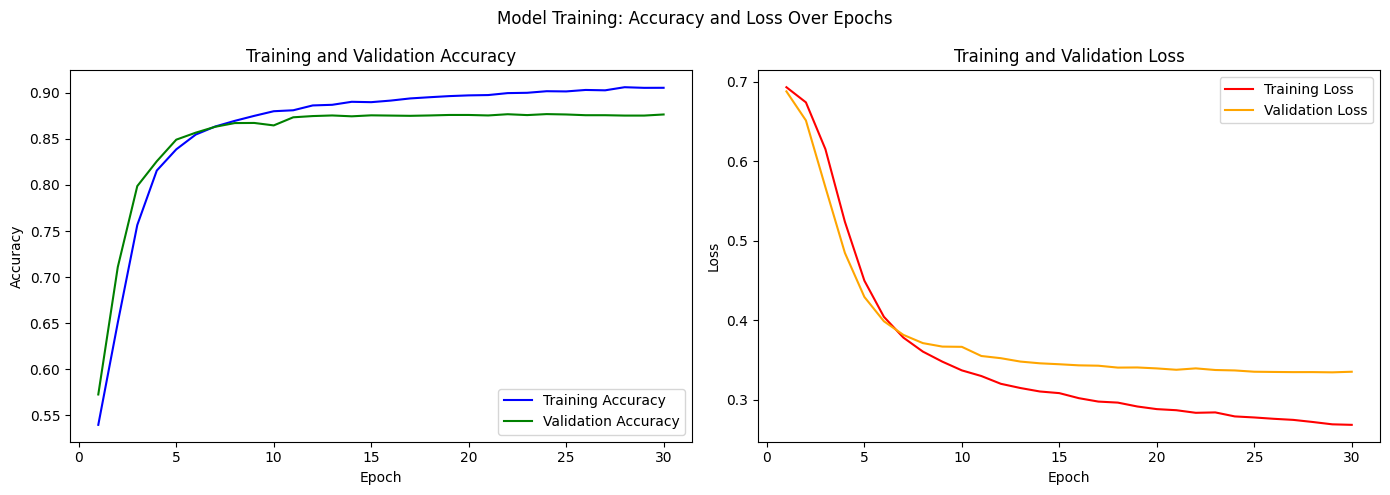

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_df['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs_range, history_df['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_df['loss'], label='Training Loss', color='red')
plt.plot(epochs_range, history_df['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training: Accuracy and Loss Over Epochs")
plt.tight_layout()
plt.show()
